In [26]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import glob
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
for kernel in ['st_only', 'svi_only', 'svi_full']:
    for inducing_points in [10,50,200, 1000]:
        for learning_rate in [0.005, 0.05, 0.5]:
            out_dir='/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/'
            out_dir = os.path.join(out_dir, f'ind{inducing_points}_kernel{kernel}_lr{learning_rate}*')
            stats_files = glob.glob(os.path.join(out_dir,'stats.csv'))
            print( glob.glob(out_dir))
            if len(stats_files) >0:
                print(stats_files)
                for stats_file in stats_files:
                    df = pd.read_csv(stats_file)
                    print(df)

['/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind10_kernelst_only_lr0.005', '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind10_kernelst_only_lr0.005_seed2']
['/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind10_kernelst_only_lr0.005/stats.csv', '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind10_kernelst_only_lr0.005_seed2/stats.csv']
    Unnamed: 0   iter          elbo       mae   bpr_100
0            0    0.0 -95174.813275  1.853676  0.172661
1            1   10.0 -92961.798980  1.834756  0.136280
2            2   20.0 -90701.566967  1.817587  0.126394
3            3   30.0 -88559.959342  1.802001  0.114781
4            4   40.0 -86257.324444  1.787782  0.123142
..         ...    ...           ...       ...       ...
88          88  880.0 -49950.936775  0.283488  0.163886
89          89  890.0 -49968.539297  0.283488  0.166935
90          90  900.0 -49971.747028  0.283488  0.147429
91          91  910.0 -49955.461677  0.283488  0.1

['/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind200_kernelsvi_full_lr0.05', '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind200_kernelsvi_full_lr0.05_seed2']
['/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind200_kernelsvi_full_lr0.05/stats.csv']
    Unnamed: 0   iter          elbo       mae   bpr_100
0            0    0.0 -93234.841483  1.851181  0.184802
1            1   10.0 -57313.521889  1.297098  0.114462
2            2   20.0 -56524.152575  1.430865  0.046739
3            3   30.0 -51641.988507  0.725379  0.043879
4            4   40.0 -53659.306325  0.919282  0.043655
5            5   50.0 -50867.372698  0.541018  0.043862
6            6   60.0 -49531.054986  0.337341  0.045376
7            7   70.0 -57103.705151  1.001087  0.108368
8            8   80.0 -56419.945503  2.067790  0.241640
9            9   90.0 -53623.389756  0.786986  0.065280
10          10  100.0 -51430.040383  0.592113  0.052996
11          11  110.0 -50437.685460  0.3

In [66]:
max_bpr = 0
max_elbo = -55000
#for kernel in ['st_only', 'svi_only', 'svi_full']:
#    for inducing_points in [10,50, 200,500, 1000]:
#        for learning_rate in [0.005, 0.05, 0.5]:
out_dir='/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/'
out_dir = os.path.join(out_dir, f'*')
stats_files = glob.glob(os.path.join(out_dir,'stats.csv'))
if len(stats_files) >0:
    for stats_file in stats_files:
        df = pd.read_csv(stats_file)
        bpr = df['bpr_100'].values[-1]
        if len(df)<200:
            continue
        if bpr>0.3:
            print(stats_file)
        if bpr>max_bpr:
            max_bpr = bpr
            best_bpr_file = stats_file
            best_bpr_df = pd.read_csv(stats_file)
        elbo = df['elbo'].values[-1]
        if elbo>max_elbo:
            max_elbo = elbo
            best_elbo_file = stats_file
            best_elbo_df = pd.read_csv(stats_file)
                    
print(max_bpr)
print(max_elbo)

/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind10_kernelsvi_only_lr0.005_seed1/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind10_kernelsvi_only_lr0.005_seed2/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind10_kernelsvi_only_lr0.05_seed1/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind10_kernelsvi_only_lr0.05_seed2/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind200_kernelsvi_full_lr0.05_seed2/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind200_kernelsvi_only_lr0.05_seed1/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind50_kernelsvi_full_lr0.005_seed1/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind50_kernelsvi_full_lr0.05_seed1/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind50_kernelsvi_full_lr0.05_seed2/stats.csv
/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_fix_soft/ind50_ker

In [78]:
best_elbo_df

,Unnamed: 0,iter,elbo,mae,bpr_100
0,0,0.0,-89387.300229,1.846895,0.105228
1,1,10.0,-56140.572387,1.633227,0.071115
2,2,20.0,-51832.008532,1.061007,0.096381
3,3,30.0,-50223.321168,0.819931,0.074593
4,4,40.0,-49276.777737,0.660522,0.080084
...,...,...,...,...,...
195,195,1950.0,-45723.575517,0.340907,0.316468
196,196,1960.0,-45707.846191,0.344207,0.305418
197,197,1970.0,-45724.375148,0.347187,0.324804
198,198,1980.0,-45748.266944,0.342356,0.312880


Text(0.5, 1.0, 'ELBO')

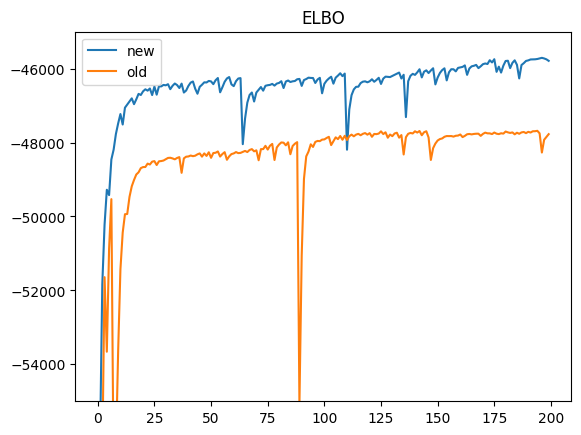

In [77]:
plt.plot( best_elbo_df.index, best_elbo_df['elbo'], label='new')
plt.plot( best_df.index, best_df['elbo'], label='old')
plt.ylim((-55000, -45000))
plt.legend()
plt.title('ELBO')

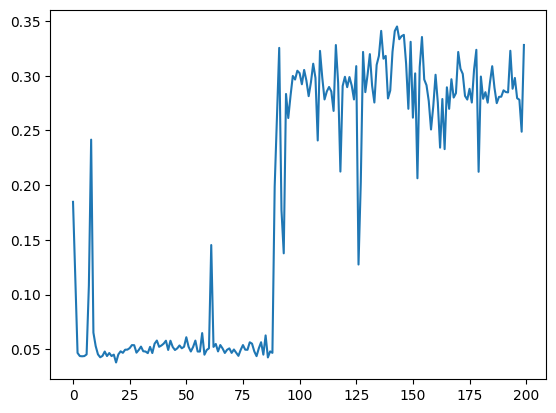

In [63]:
plt.plot( best_df.index, best_df['bpr_100'])

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [93]:
best_df[best_df['bpr_100'].max()==best_df['bpr_100']]

,Unnamed: 0,iter,elbo,mae,bpr_100
61,61,610.0,-50618.341782,0.291977,0.283748
76,76,760.0,-50281.172621,0.285837,0.283748


In [94]:
160*.28


44.800000000000004

In [11]:
out_dir='/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/'
out_dir = os.path.join(out_dir, f'ind*_kernel*_lr*')
stats_files = glob.glob(out_dir)

In [12]:
stats_files


['/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelst_only_lr0.005',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelst_only_lr0.05',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelst_only_lr0.5',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelsvi_full_lr0.005',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelsvi_full_lr0.05',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelsvi_full_lr0.5',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelsvi_only_lr0.005',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelsvi_only_lr0.05',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind1000_kernelsvi_only_lr0.5',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind10_kernelst_only_lr0.0005_seed1',
 '/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind10_kernelst_onl

In [17]:
best_elbo_file

'/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind200_kernelsvi_full_lr0.05/stats.csv'

In [23]:
pd.read_csv('/cluster/tufts/hugheslab/kheuto01/opioid/logs/poi_savemod/ind200_kernelsvi_full_lr0.05_seed2/stats.csv')

,Unnamed: 0,iter,elbo,mae,bpr_100
0,0,0.0,-93882.839672,1.962861,0.122725
1,1,10.0,-59074.386559,1.696104,0.084246
2,2,20.0,-51361.753662,1.285239,0.117432
3,3,30.0,-56100.534507,1.419532,0.065176
4,4,40.0,-52255.020181,0.915813,0.066787
...,...,...,...,...,...
69,69,690.0,-47798.899800,15.117436,0.328840
70,70,700.0,-47755.795492,1.737836,0.255287
71,71,710.0,-47793.241168,0.286040,0.047057
72,72,720.0,-47761.202854,50.354643,0.345237


In [64]:
best_df

,Unnamed: 0,iter,elbo,mae,bpr_100
0,0,0.0,-93234.841483,1.851181,0.184802
1,1,10.0,-57313.521889,1.297098,0.114462
2,2,20.0,-56524.152575,1.430865,0.046739
3,3,30.0,-51641.988507,0.725379,0.043879
4,4,40.0,-53659.306325,0.919282,0.043655
...,...,...,...,...,...
195,195,1950.0,-47751.312598,95.225593,0.298016
196,196,1960.0,-48269.454401,59.613199,0.279495
197,197,1970.0,-47924.222178,77.293496,0.278107
198,198,1980.0,-47850.408004,19.931716,0.248887


In [65]:
len(best_elbo_df)

200